In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import pandas as pd

import sys
sys.path.append('../scripts/')
import sigjson_f2021b

In [3]:
from astropy import table
from astropy.io import fits

In [4]:
obsdir="/Users/kadofong/Google Drive/My Drive/MerianSurvey/observing/DataLogs/"

In [5]:
db = table.Table(fits.open(f'{obsdir}/db_merian.fits')[1].data)

In [6]:
from skipper import observe

In [7]:
tele = pd.read_csv ( f'{obsdir}/tele20220210.csv')

In [8]:
halpha_s2022a = pd.read_csv('../pointings/gama_2022A.csv', index_col='object.1')

oiii_pointings = sigjson_f2021b.load_mastercat_cosmos ()
halpha_pointings = sigjson_f2021b.load_mastercat_cosmos ( '../pointings/S2021A.csv')
all_pointings = np.concatenate([oiii_pointings.index, halpha_pointings.index])

get_catalog_objects = lambda x: x['object'].str.extract(r'(.*?(?=_))')[0]
oiii_s2022a = halpha_s2022a.copy()
oiii_s2022a['filter'] = 'N540'
oiii_s2022a['object'] = [ xo.replace('N708','N540') for xo in oiii_s2022a['object'] ]
oiii_s2022a.index = oiii_s2022a['object']
oiii_s2022a['expTime'] = 900.


halpha_cosmos = halpha_pointings.loc[get_catalog_objects(halpha_pointings)=='COSMOS'].copy()
halpha_cosmos['priority_name'] = 'COSMOS'
halpha_s2022a = pd.concat([halpha_s2022a, halpha_cosmos], sort=False)                                   

oiii_cosmos = oiii_pointings.loc[get_catalog_objects(oiii_pointings)=='COSMOS'].copy()
oiii_cosmos['priority_name'] = 'COSMOS'
oiii_s2022a = pd.concat([oiii_s2022a, oiii_cosmos], sort=False)

In [9]:
obs = oiii_s2022a.reindex(tele['object'])
obs = obs.loc[~obs['object'].isna()]

In [10]:
is_oiii = tele['filter'] == 'N540'
is_spring = tele['object'].apply(lambda x: 'COSMOS' in x or 'GAMA' in x)

In [11]:
tobj = tele.set_index('object')

In [12]:
import datetime

In [13]:
dtdf = pd.Series(index=tobj.index)
for name in tobj.index:
    if not isinstance(tobj.loc[name,'date'],str):
        continue
    dts = tobj.loc[name,'date'].split('+')[0]
    dtime = datetime.datetime.strptime ( dts, '%Y-%m-%d %H:%M:%S.%f') 
    dtdf.loc[name] = dtime
cutoff = datetime.datetime(2022, 1, 12)
recent = dtdf > cutoff

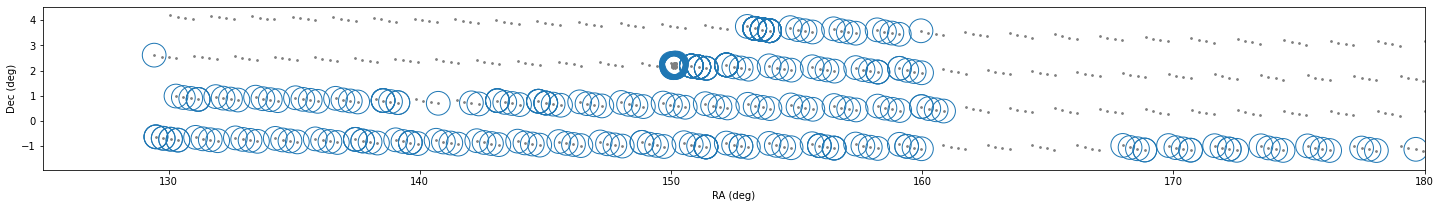

In [14]:
fig, ax = plt.subplots(1,1,figsize=(20,4),)
ax.set_aspect('equal')


plt.scatter ( oiii_s2022a['RA'], oiii_s2022a['dec'], color='grey', s=3 )
for name, row in obs.iterrows():
    color = 'tab:blue'
    circle = patches.Circle ( (float(row['RA']),float(row['dec'])), 
                             radius=np.sqrt(2.2)/np.pi, facecolor='None', 
                             edgecolor=color)
    ax.add_patch(circle)
    #plt.scatter ( obs['RA'], obs['dec'], color='r')
    
ax.set_xlabel('RA (deg)')
ax.set_ylabel('Dec (deg)')
ax.set_xlim(125,180)
plt.tight_layout ()

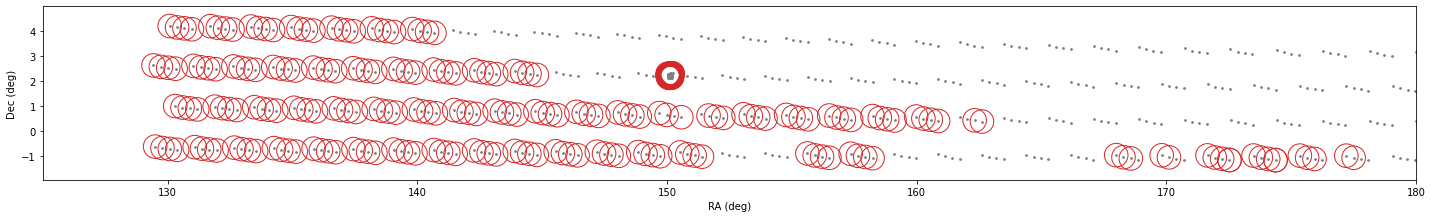

In [15]:
obs_halpha = halpha_s2022a.reindex(tele['object'])
obs_halpha = obs_halpha.loc[~obs_halpha['object'].isna()]

fig, ax = plt.subplots(1,1,figsize=(20,4),)
ax.set_aspect('equal')


plt.scatter ( halpha_s2022a['RA'], halpha_s2022a['dec'], color='grey', s=3 )
for name, row in obs_halpha.iterrows():
    color = 'tab:red'
    circle = patches.Circle ( (float(row['RA']),float(row['dec'])), 
                             radius=np.sqrt(2.2)/np.pi, facecolor='None', 
                             edgecolor=color)
    ax.add_patch(circle)
    #plt.scatter ( obs_halpha['RA'], obs_halpha['dec'], color='r')
    
ax.set_xlabel('RA (deg)')
ax.set_ylabel('Dec (deg)')
ax.set_xlim(125,180)
plt.tight_layout ()

In [16]:
ctio = observe.ObservingSite ()
night_start, night_end = ctio.get_sunriseset ( 2022,2,2)

In [17]:
from astropy import units as u

In [19]:
import sigjson_s2022a

In [23]:
import datetime

In [32]:
today = datetime.date.today ()

In [36]:
today < today

False

In [27]:
dates = sigjson_s2022a.dates

In [35]:
datetime.date(*dates[0])# > today

datetime.date(2022, 2, 2)

In [41]:
is_queued_oiii, is_queued_halpha = sigjson_s2022a.predict_remainder ('../../DataLogs/tele20220210.csv')

On 2022/3/1, we are observing COSMOSGAMA in N540
We are observing the second half of the night
6 pointings in this catalog need reobservation!
[predict] night slot: Second half
obsStart: 2022/03/02 01:55 AM Santiago
          2022/03/01 11:55 PM ET
          2022/03/01 08:55 PM PT
          2022/03/02 04:55 AM UTC
obsEnd:   2022/03/02 06:32 AM Santiago
          2022/03/02 04:32 AM ET
          2022/03/02 01:32 AM PT
          2022/03/02 09:32 AM UTC
Moon illumination is: 0.00
Moon max altitude during observation is: 0.00
Minimum airmass available: 1.147527217065508
(270s) Not enough time for an exposure. Skipping...
Minimum airmass available: 1.1454466080726533

==> 20220302_05, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.1433666403446452

==> 20220302_06, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1

Minimum airmass available: 1.144544918622491

==> 20220304_04, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.1464077427214625

==> 20220304_05, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.1433168315204179

==> 20220304_06, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
3600.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.1430256785942268

==> 20220304_07, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
3600.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.1453790322057713

==> 20220304_08, 3600.0s available
0.0

Minimum airmass available: 1.141999654344636

==> 20220306_05, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.1421806890387673

==> 20220306_06, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.143208299800475

==> 20220306_07, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
3600.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.1452525896788441

==> 20220306_08, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
3600.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.1652744146969638

==> 20220306_09, 2099.999999999956s ava


==> 20220308_06, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
3600.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.1434231901138712

==> 20220308_07, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
3600.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.1465364301149328

==> 20220308_08, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
3600.0s filled by priority=3.0 objects
Minimum airmass available: 1.1969542426225386

==> 20220308_09, 2159.999999999946s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
1800.0s filled by priority=3.0 objects
 .   . 
 {\*/} 
  >!<  BACKUP FIELD INFO
 (/^\) 
 '   ' 
time (UTC)		SXDS	COSMOS	GH14	NSA15235	
2022/03/08 02:30 AM	-17

Minimum airmass available: 1.1436739379929903

==> 20220310_07, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
2400.0s filled by priority=2.0 objects
1200.0s filled by priority=3.0 objects
Minimum airmass available: 1.1587856675168027

==> 20220310_08, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
3600.0s filled by priority=3.0 objects
Minimum airmass available: 1.221679425262188

==> 20220310_09, 2279.9999999999454s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
1800.0s filled by priority=3.0 objects
 .   . 
 {\*/} 
  >!<  BACKUP FIELD INFO
 (/^\) 
 '   ' 
time (UTC)		SXDS	COSMOS	GH14	NSA15235	
2022/03/10 02:30 AM	-11.67	1.23	19.63	26.13	
2022/03/10 03:30 AM	-3.31	1.18	3.69	3.85	
2022/03/10 04:30 AM	-2.02	1.22	2.13	2.17	
2022/03/10 05:30 AM	-1.53	1.36	1.57	1.59	
2022/03/10 06:30 AM	-1.31	1.66	1

In [119]:
for idx,(date,slot,mfilt) in enumerate(zip(sigjson_s2022a.dates, sigjson_s2022a.slots, sigjson_s2022a.filters)):
    print(f'#{idx:02d} :: {date}\t{slot}::{mfilt}')

#00 :: (2022, 2, 2)	4::N540
#01 :: (2022, 2, 3)	4::N540
#02 :: (2022, 2, 4)	4::N540
#03 :: (2022, 2, 5)	4::N540
#04 :: (2022, 2, 6)	2::N540
#05 :: (2022, 2, 7)	2::N540
#06 :: (2022, 2, 8)	2::N540
#07 :: (2022, 2, 9)	2::N540
#08 :: (2022, 2, 10)	2::N540
#09 :: (2022, 2, 28)	2::N540
#10 :: (2022, 3, 1)	2::N540
#11 :: (2022, 3, 2)	3::N540
#12 :: (2022, 3, 3)	3::N540
#13 :: (2022, 3, 4)	3::N540
#14 :: (2022, 3, 5)	3::N708
#15 :: (2022, 3, 6)	3::N708
#16 :: (2022, 3, 7)	3::N708
#17 :: (2022, 3, 8)	3::N708
#18 :: (2022, 3, 9)	3::N708


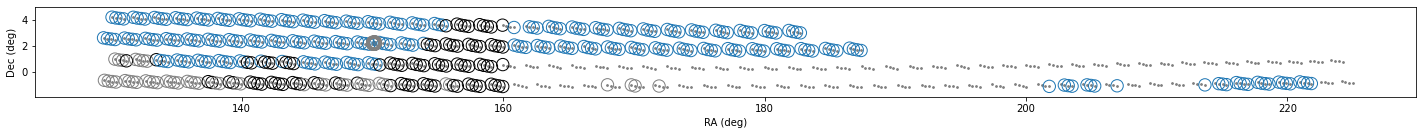

In [120]:
fig, ax = plt.subplots(1,1,figsize=(20,4),)
ax.set_aspect('equal')


plt.scatter ( oiii_s2022a['RA'], oiii_s2022a['dec'], color='grey', s=3 )
for name, qrow in is_queued_oiii.iterrows():
    if not qrow['is_queued']:
        continue
    if isinstance(qrow['qstamp'], str):
        if '202201' in qrow['qstamp']:
            color='k'
        else:
            color = 'tab:blue'
    else:
        color='grey'
    row = oiii_s2022a.loc[name]
    circle = patches.Circle ( (float(row['RA']),float(row['dec'])), 
                             radius=np.sqrt(2.2)/np.pi, facecolor='None', 
                             edgecolor=color)
    ax.add_patch(circle)
    #plt.scatter ( obs['RA'], obs['dec'], color='r')
    
ax.set_xlabel('RA (deg)')
ax.set_ylabel('Dec (deg)')
#ax.set_xlim(125,180)
plt.tight_layout ()
plt.savefig('../../figures/prediction-N540_s2022a.png')

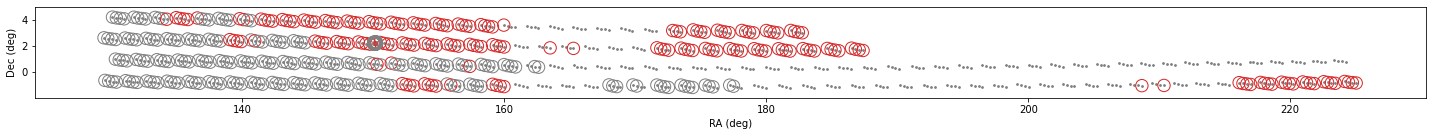

In [122]:
fig, ax = plt.subplots(1,1,figsize=(20,4),)
ax.set_aspect('equal')


plt.scatter ( halpha_s2022a['RA'], halpha_s2022a['dec'], color='grey', s=3 )
for name, qrow in is_queued_halpha.iterrows():
    if not qrow['is_queued']:
        continue
    if isinstance(qrow['qstamp'], str):
        if '202201' in qrow['qstamp']:
            color='grey'
        else:
            color = 'tab:red'
    else:
        color='grey'
    row = halpha_s2022a.loc[name]
    circle = patches.Circle ( (float(row['RA']),float(row['dec'])), 
                             radius=np.sqrt(2.2)/np.pi, facecolor='None', 
                             edgecolor=color)
    ax.add_patch(circle)
    #plt.scatter ( obs['RA'], obs['dec'], color='r')
    
ax.set_xlabel('RA (deg)')
ax.set_ylabel('Dec (deg)')
#ax.set_xlim(125,180)
plt.tight_layout ()
plt.tight_layout ()
plt.savefig('../../figures/prediction-N708_s2022a.png')